In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [60]:
fips_codes = pd.read_csv("Data/FIPS_County_Key.csv", encoding="ISO-8859-1").dropna()[['fips','name']]
fips_codes.head()


,fips,name
2,1001,Autauga County
3,1003,Baldwin County
4,1005,Barbour County
5,1007,Bibb County
6,1009,Blount County


In [61]:
mask_use = pd.read_csv("Data/Mask_Use.csv")
mask_use['mask_use'] = mask_use['FREQUENTLY'] + mask_use['ALWAYS']
mask_use = mask_use[['COUNTYFP','mask_use']]
mask_use.head()

,COUNTYFP,mask_use
0,1001,0.739
1,1003,0.759
2,1005,0.692
3,1007,0.850
4,1009,0.653


In [62]:
curr_merged = pd.merge(fips_codes,mask_use,left_on='fips', right_on='COUNTYFP').drop('COUNTYFP', axis=1)
curr_merged.head()

,fips,name,mask_use
0,1001,Autauga County,0.739
1,1003,Baldwin County,0.759
2,1005,Barbour County,0.692
3,1007,Bibb County,0.850
4,1009,Blount County,0.653


In [63]:
demographics = pd.read_csv("Data/Demographics.csv").drop(['COUNTY'],axis=1)
demographics['state'] = demographics['STATE'].str.lower()
demographics['population'] = demographics['E_TOTPOP']
demographics['poverty'] = demographics['E_POV'] / demographics['E_TOTPOP']
demographics['unemployment'] = demographics['E_UNEMP'] / demographics['E_TOTPOP']
demographics['income'] = demographics['E_PCI']
demographics['elderly'] = demographics['E_AGE65'] / demographics['E_TOTPOP']
demographics['minority'] = demographics['E_MINRTY'] / demographics['E_TOTPOP']
demographics['close_living'] = demographics['E_CROWD'] / demographics['E_TOTPOP']
demographics['uninsured'] = demographics['E_UNINSUR'] / demographics['E_TOTPOP']
demographics = demographics.drop(['E_TOTPOP','E_POV','E_UNEMP','E_PCI','E_AGE65','E_MINRTY','E_CROWD','E_UNINSUR'], axis=1)
demographics.head()

,STATE,FIPS,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured
0,ALABAMA,1001,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199
1,ALABAMA,1009,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342
2,ALABAMA,1013,alabama,20025,0.231710,0.028315,20430,0.190062,0.481448,0.005943,0.100125
3,ALABAMA,1015,alabama,115098,0.180881,0.040209,24706,0.168430,0.275200,0.006707,0.092843
4,ALABAMA,1017,alabama,33826,0.163513,0.022852,22827,0.189470,0.442086,0.011943,0.106811


In [64]:
curr_merged = pd.merge(curr_merged,demographics,left_on='fips', right_on='FIPS').drop(['FIPS','STATE'],axis=1)
curr_merged.head()

,fips,name,mask_use,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,31203,0.195404,0.169812,0.004762,0.100256
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,18461,0.179738,0.538515,0.012140,0.099217
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,20199,0.162516,0.254184,0.002308,0.071869
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342


In [65]:
deaths = pd.read_csv("Data/us-counties-deaths.csv")
deaths = deaths[['fips','deaths']]
deaths.head()

,fips,deaths
0,1001.0,102.0
1,1003.0,301.0
2,1005.0,55.0
3,1007.0,58.0
4,1009.0,132.0


In [66]:
curr_merged = pd.merge(curr_merged,deaths,on='fips')
curr_merged.head()

,fips,name,mask_use,state,population,poverty,unemployment,income,elderly,minority,close_living,uninsured,deaths
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,29372,0.145833,0.249783,0.005417,0.070199,102.0
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,31203,0.195404,0.169812,0.004762,0.100256,301.0
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,18461,0.179738,0.538515,0.012140,0.099217,55.0
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,20199,0.162516,0.254184,0.002308,0.071869,58.0
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,22656,0.177518,0.128597,0.005881,0.109342,132.0


In [67]:
# vaccinations = pd.read_csv("Data/Vaccinations_State.csv").groupby("location").max()['people_vaccinated_per_hundred']
# vaccinations = vaccinations.drop(['Bureau of Prisons','American Samoa','Dept of Defense','Indian Health Svc','Federated States of Micronesia','Virgin Islands','Long Term Care','Marshall Islands','Northern Mariana Islands','Republic of Palau','Guam','Veterans Health','District of Columbia'])
# vaccinations.rename(index={'New York State':'New York'},inplace=True)
# vaccinations.head()

In [68]:
mobility21 = pd.read_csv("Data/Mobility2021.csv")
mobility20 = pd.read_csv("Data/Mobility2020.csv")
mobility20 = mobility20.dropna(subset=['census_fips_code'],axis=0)[['census_fips_code','workplaces_percent_change_from_baseline']]
mobility21 = mobility21.dropna(subset=['census_fips_code'],axis=0)[['census_fips_code','workplaces_percent_change_from_baseline']]
mobility = pd.concat([mobility21,mobility20]).groupby('census_fips_code').mean()

In [69]:
df = pd.merge(curr_merged,mobility,left_on='fips',right_on='census_fips_code').dropna()
df['deaths_per_capita'] = df['deaths'] / df['population']
df = df.drop(['deaths'],axis=1)
df['income_per_capita'] = df['income'] / df['population']
income_df = df['income']
df = df.drop(['income'],axis=1)
df['workplaces_percent_change'] = df['workplaces_percent_change_from_baseline'] / 100
df = df.drop(['workplaces_percent_change_from_baseline'],axis=1)
df.head()

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941


In [70]:
df['impact'] = ['high_impact' if (i > 0.0017336209254577171) else 'low_impact'  for i in df['deaths_per_capita']]
df.head()

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change,impact
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120,high_impact
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617,low_impact
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912,high_impact
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046,high_impact
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941,high_impact


25th = 0.001144319722881223

50th = 0.0017336209254577171

75th = 0.002397944255696282

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # just to format confusion matrix

data = df.drop(columns=["fips",'name','state','population','impact','deaths_per_capita'])
target = df['impact']
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)
data.head()

,mask_use,poverty,unemployment,elderly,minority,close_living,uninsured,income_per_capita,workplaces_percent_change
0,0.739,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.532101,-0.223120
1,0.759,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.149937,-0.215617
2,0.692,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.716042,-0.187912
3,0.850,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.896657,-0.194046
4,0.653,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.393026,-0.231941


Classification Accuracy:  0.6476190476190476


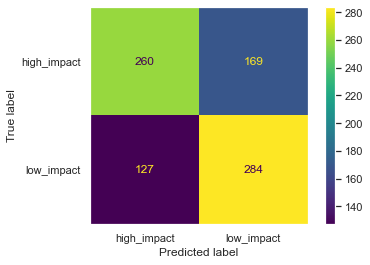

In [72]:

logistic_model = LogisticRegression()
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [73]:
df['impact'].value_counts()

low_impact     1400
high_impact    1400
Name: impact, dtype: int64

In [74]:
df['deaths_per_capita'].quantile(.9)

0.003124159220333974

In [75]:
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # Write your code for question 4 here
# params_to_try = {'n_neighbors': range(1,30)}
# knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
# knn_search.fit(train_data, train_target)
# print(knn_search.best_params_)
# print("Accuracy on training data: ", knn_search.score(train_data, train_target))
# print("Accuracy on testing data: ", knn_search.score(test_data, test_target))

In [76]:
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(train_data, train_target)
# predictions = clf.predict(test_data)

# from sklearn.metrics import classification_report

# print(classification_report(test_target, predictions))

[-0.00104701]
0.1335959221708201


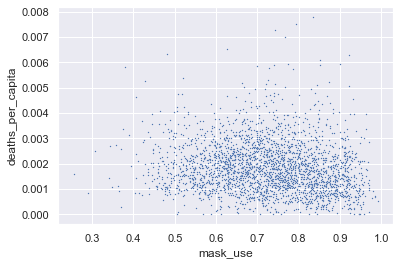

In [77]:
sns.scatterplot(data=df,x='mask_use', y='deaths_per_capita',s=2)

data = df[['mask_use']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.01093783]
0.06681476661712975


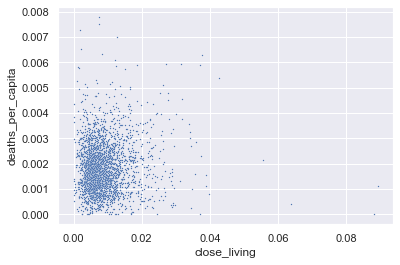

In [78]:
sns.scatterplot(data=df,x='close_living', y='deaths_per_capita',s=2)

data = df[['close_living']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[8.2166982e-05]
0.10227837648625543


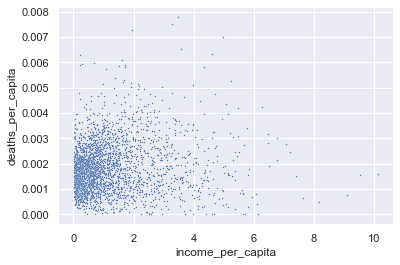

In [79]:
sns.scatterplot(data=df,x='income_per_capita', y='deaths_per_capita',s=2)

data = df[['income_per_capita']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.00529309]
0.24705322656090234


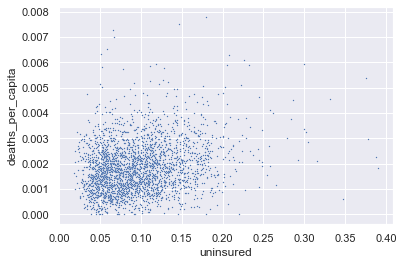

In [80]:
sns.scatterplot(data=df,x='uninsured', y='deaths_per_capita',s=2)

data = df[['uninsured']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.00127327]
0.2502135419041838


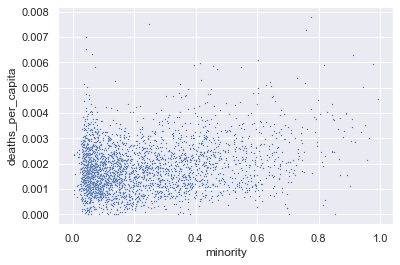

In [81]:
sns.scatterplot(data=df,x='minority', y='deaths_per_capita',s=2)

data = df[['minority']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.00210386]
0.0898251544971666


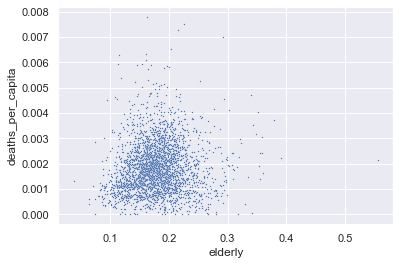

In [82]:
sns.scatterplot(data=df,x='elderly', y='deaths_per_capita',s=2)

data = df[['elderly']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.01366918]
0.13485353027711697


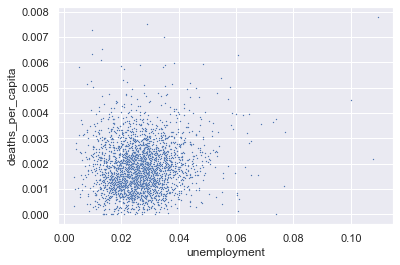

In [83]:
sns.scatterplot(data=df,x='unemployment', y='deaths_per_capita',s=2)

data = df[['unemployment']].values
target = df['deaths_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

In [84]:
cases = pd.read_csv("Data/County_Cases_Time_Series.csv")
cases = cases[['FIPS','3/20/21']]
cases
df = pd.merge(df,cases,left_on='fips',right_on='FIPS').dropna()
df['cases_per_capita'] = df['3/20/21'] / df['population']
df = df.drop(['FIPS', '3/20/21'],axis=1)
df.head()
# # df['deaths_per_capita'] = df['deaths'] / df['population']
# # df = df.drop(['deaths'],axis=1)
# # df['income_per_capita'] = df['income'] / df['population']

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change,impact,cases_per_capita
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120,high_impact,0.117935
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617,low_impact,0.097685
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912,high_impact,0.085796
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046,high_impact,0.112221
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941,high_impact,0.110712


[0.57498339]
0.12020250661201021


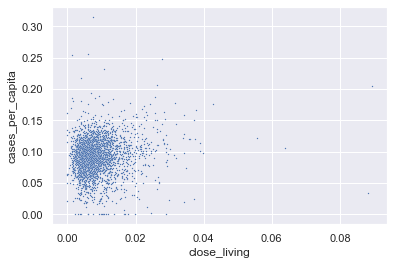

In [85]:
sns.scatterplot(data=df,x='close_living', y='cases_per_capita',s=2)

data = df[['close_living']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[-0.07383939]
0.32243979127121586


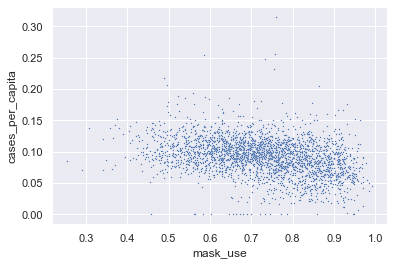

In [86]:
sns.scatterplot(data=df,x='mask_use', y='cases_per_capita',s=2)

data = df[['mask_use']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.02775201]
0.18663877062998097


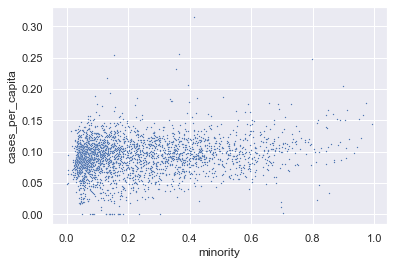

In [87]:
sns.scatterplot(data=df,x='minority', y='cases_per_capita',s=2)

data = df[['minority']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[0.10356018]
0.16542096675303633


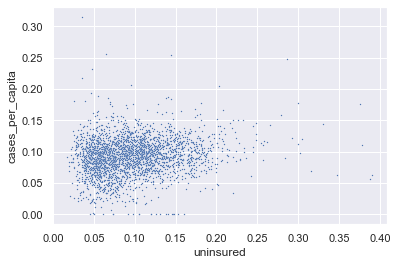

In [88]:
sns.scatterplot(data=df,x='uninsured', y='cases_per_capita',s=2)

data = df[['uninsured']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[-0.09972469]
0.03366971320961865


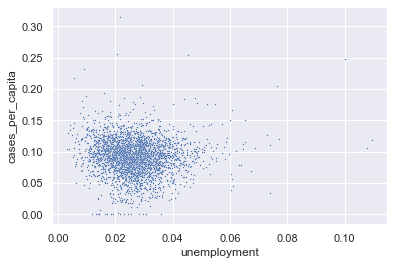

In [89]:
sns.scatterplot(data=df,x='unemployment', y='cases_per_capita',s=2)

data = df[['unemployment']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

[-0.16283426]
0.23792667846187518


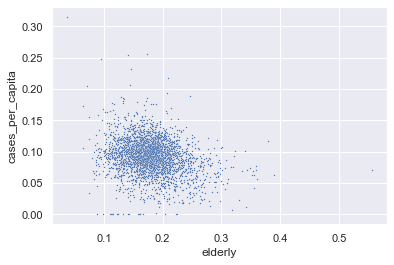

In [90]:
sns.scatterplot(data=df,x='elderly', y='cases_per_capita',s=2)

data = df[['elderly']].values
target = df['cases_per_capita'].values

linear_model = LinearRegression().fit(X=data,y=target)
prediction = linear_model.predict(data)
print(linear_model.coef_)
print(np.sqrt(linear_model.score(X=data,y=target)))

Classification Accuracy:  0.676530612244898


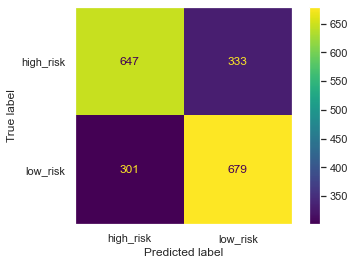

In [91]:
df['risk'] = ['high_risk' if (i > .0933564902092561) else 'low_risk'  for i in df['cases_per_capita']]


data = df.drop(columns=["fips",'name','state','population','impact','deaths_per_capita','cases_per_capita','risk'])
target = df['risk']
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.7, 
                                                                    random_state=112)
logistic_model = LogisticRegression(max_iter=1000,C=50)
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [92]:
education = pd.read_csv("Data/Education.csv")
education = education.dropna()
education = education[['FIPS Code','2013 Rural-urban Continuum Code','Percent of adults with a bachelor\'s degree or higher, 2015-19']]
education['rural_code'] = education['2013 Rural-urban Continuum Code'] 
education['rural_code'] = education['rural_code'] / education['rural_code'].max()
education['education_level'] = education['Percent of adults with a bachelor\'s degree or higher, 2015-19'] / 100
education = education.drop(['2013 Rural-urban Continuum Code','Percent of adults with a bachelor\'s degree or higher, 2015-19'], axis=1)
education.head()
df = pd.merge(df, education, left_on='fips', right_on='FIPS Code')
df = df.drop(['FIPS Code'],axis=1)
df = df.dropna()
data = df.drop(columns=["fips",'name','state','population','impact','deaths_per_capita','cases_per_capita','risk'])
target = df['risk']
df.head()

,fips,name,mask_use,state,population,poverty,unemployment,elderly,minority,close_living,uninsured,deaths_per_capita,income_per_capita,workplaces_percent_change,impact,cases_per_capita,risk,rural_code,education_level
0,1001,Autauga County,0.739,alabama,55200,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.001848,0.532101,-0.223120,high_impact,0.117935,high_risk,0.222222,0.266
1,1003,Baldwin County,0.759,alabama,208107,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.001446,0.149937,-0.215617,low_impact,0.097685,high_risk,0.333333,0.319
2,1005,Barbour County,0.692,alabama,25782,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.002133,0.716042,-0.187912,high_impact,0.085796,low_risk,0.666667,0.116
3,1007,Bibb County,0.850,alabama,22527,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.002575,0.896657,-0.194046,high_impact,0.112221,high_risk,0.111111,0.104
4,1009,Blount County,0.653,alabama,57645,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.002290,0.393026,-0.231941,high_impact,0.110712,high_risk,0.111111,0.131


In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

X = data.iloc[:,0:20]  #independent columns
y = target   #target column i.e price range
y.head()

rfe = RFE(logistic_model, 1)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X.head()

C:\Users\Justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 1
Selected Features: [False False  True False False False False False False False False]
Feature Ranking: [ 4  9  1  2  5  6  7 11  3 10  8]


,mask_use,poverty,unemployment,elderly,minority,close_living,uninsured,income_per_capita,workplaces_percent_change,rural_code,education_level
0,0.739,0.152572,0.019293,0.145833,0.249783,0.005417,0.070199,0.532101,-0.223120,0.222222,0.266
1,0.759,0.104047,0.020869,0.195404,0.169812,0.004762,0.100256,0.149937,-0.215617,0.333333,0.319
2,0.692,0.255876,0.035606,0.179738,0.538515,0.012140,0.099217,0.716042,-0.187912,0.666667,0.116
3,0.850,0.127092,0.029209,0.162516,0.254184,0.002308,0.071869,0.896657,-0.194046,0.111111,0.104
4,0.653,0.142597,0.015769,0.177518,0.128597,0.005881,0.109342,0.393026,-0.231941,0.111111,0.131


In [94]:
#apply SelectKBest class to extract top 10 best features
X['workplaces_percent_change'] = X['workplaces_percent_change'] * -1
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                        Specs     Score
4                    minority  9.324512
0                    mask_use  4.620640
10            education_level  3.564929
7           income_per_capita  1.772021
9                  rural_code  1.609438
8   workplaces_percent_change  1.244526
3                     elderly  1.086061
6                   uninsured  1.040396
1                     poverty  0.598844
5                close_living  0.127145
2                unemployment  0.026533


Classification Accuracy:  0.684560327198364


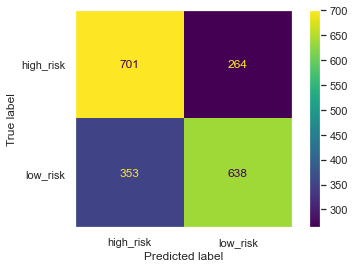

In [95]:
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.7, 
                                                                    random_state=112)
logistic_model = LogisticRegression(max_iter=1000,C=50)
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)

In [96]:
# This is the start of normalize data model

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # just to format confusion matri
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data=pd.DataFrame(x_scaled, columns=data.columns)
target = df['risk']
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=110)
data.head()

,mask_use,poverty,unemployment,elderly,minority,close_living,uninsured,income_per_capita,workplaces_percent_change,rural_code,education_level
0,0.656716,0.251055,0.150699,0.208208,0.249306,0.060581,0.140792,0.052166,0.243474,0.125,0.293629
1,0.683853,0.157302,0.165540,0.303909,0.168500,0.053259,0.221542,0.014472,0.229523,0.250,0.367036
2,0.592944,0.450644,0.304354,0.273664,0.541052,0.135778,0.218749,0.070308,0.178010,0.625,0.085873
3,0.807327,0.201825,0.244100,0.240415,0.253753,0.025817,0.145279,0.088123,0.189415,0.000,0.069252
4,0.540027,0.231782,0.117500,0.269377,0.126856,0.065772,0.245951,0.038448,0.259874,0.000,0.106648


Classification Accuracy:  0.700834326579261


(839, 11)

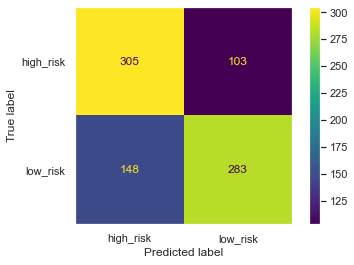

In [100]:
logistic_model = LogisticRegression(C=50)
logistic_model.fit(X=train_data,y=train_target).predict(test_data)
print("Classification Accuracy: ", logistic_model.score(test_data, test_target))
plot_confusion_matrix(logistic_model, test_data, test_target)
plt.grid(False)
test_data.shape

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

X = data.iloc[:,0:20]  #independent columns
y = target   #target column i.e price range

#apply SelectKBest class to extract top 10 best features
X['workplaces_percent_change'] = X['workplaces_percent_change'] * -1
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                        Specs     Score
0                    mask_use  9.676077
4                    minority  9.545396
10            education_level  6.524787
8   workplaces_percent_change  3.874646
6                   uninsured  3.429245
3                     elderly  2.659058
9                  rural_code  2.311992
5                close_living  1.422009
1                     poverty  1.361046
2                unemployment  0.285124
7           income_per_capita  0.175246
